In [7]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For styling the plots
plt.style.use('ggplot')
import nltk # Where we will perform all the operations

In [9]:
# Reading the data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## QUICK EDA

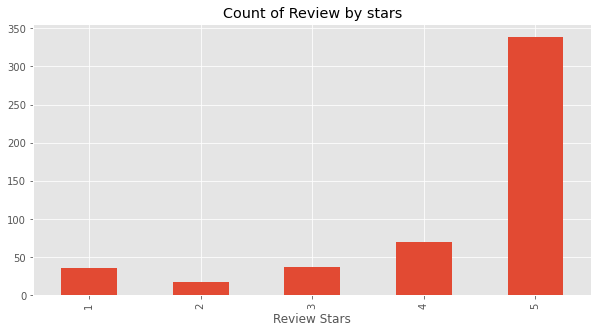

In [11]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind = 'bar',
         title = 'Count of Review by stars',
         figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

## BASIC NLTK

In [12]:
## Here we will perform tokenization and chunking on a given piece of text
## first and then on the whole dataset
example = df['Text'][20]
print(example)

My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner.


In [13]:
## Tokenization
tokens = nltk.word_tokenize(example)
print(tokens)

['My', 'husband', 'is', 'a', 'Twizzlers', 'addict', '.', 'We', "'ve", 'bought', 'these', 'many', 'times', 'from', 'Amazon', 'because', 'we', "'re", 'government', 'employees', 'living', 'overseas', 'and', 'ca', "n't", 'get', 'them', 'in', 'the', 'country', 'we', 'are', 'assigned', 'to', '.', 'They', "'ve", 'always', 'been', 'fresh', 'and', 'tasty', ',', 'packed', 'well', 'and', 'arrive', 'in', 'a', 'timely', 'manner', '.']


In [14]:
## Then we'll perform post tagging where every word
## in the sentence is represented by a given tag.
tagged = nltk.pos_tag(tokens)
print(tagged)

[('My', 'PRP$'), ('husband', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('Twizzlers', 'NNP'), ('addict', 'NN'), ('.', '.'), ('We', 'PRP'), ("'ve", 'VBP'), ('bought', 'VBN'), ('these', 'DT'), ('many', 'JJ'), ('times', 'NNS'), ('from', 'IN'), ('Amazon', 'NNP'), ('because', 'IN'), ('we', 'PRP'), ("'re", 'VBP'), ('government', 'NN'), ('employees', 'NNS'), ('living', 'VBG'), ('overseas', 'RB'), ('and', 'CC'), ('ca', 'MD'), ("n't", 'RB'), ('get', 'VB'), ('them', 'PRP'), ('in', 'IN'), ('the', 'DT'), ('country', 'NN'), ('we', 'PRP'), ('are', 'VBP'), ('assigned', 'VBN'), ('to', 'TO'), ('.', '.'), ('They', 'PRP'), ("'ve", 'VBP'), ('always', 'RB'), ('been', 'VBN'), ('fresh', 'JJ'), ('and', 'CC'), ('tasty', 'JJ'), (',', ','), ('packed', 'VBN'), ('well', 'RB'), ('and', 'CC'), ('arrive', 'JJ'), ('in', 'IN'), ('a', 'DT'), ('timely', 'JJ'), ('manner', 'NN'), ('.', '.')]


In [15]:
# Performing chunking on the data
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  My/PRP$
  husband/NN
  is/VBZ
  a/DT
  Twizzlers/NNP
  addict/NN
  ./.
  We/PRP
  've/VBP
  bought/VBN
  these/DT
  many/JJ
  times/NNS
  from/IN
  (GPE Amazon/NNP)
  because/IN
  we/PRP
  're/VBP
  government/NN
  employees/NNS
  living/VBG
  overseas/RB
  and/CC
  ca/MD
  n't/RB
  get/VB
  them/PRP
  in/IN
  the/DT
  country/NN
  we/PRP
  are/VBP
  assigned/VBN
  to/TO
  ./.
  They/PRP
  've/VBP
  always/RB
  been/VBN
  fresh/JJ
  and/CC
  tasty/JJ
  ,/,
  packed/VBN
  well/RB
  and/CC
  arrive/JJ
  in/IN
  a/DT
  timely/JJ
  manner/NN
  ./.)


## VADER : Valence Awareness Dictionary and Sentiment Reasoning

In [16]:
## In the VADER approach we use the "bag of words" technique

## In "bag of words" , we extract the features of the text to be further
## processed in the anaysis
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Building the object for the model
sia = SentimentIntensityAnalyzer()

In [17]:
# Polarity scores will tell about the measure of :
#      1) Positive (pos)
#      2) Negative (neg)
#      3) Neutral (neu)
#      4) compound (the aggrgation)
sia.polarity_scores('I am a good boy')

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [18]:
sia.polarity_scores('Today is a nice weather')

{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

In [19]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.6249}

In [20]:
## Run the polarity scores on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how = 'left')

In [23]:
# Now we have the sentiment score and the metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


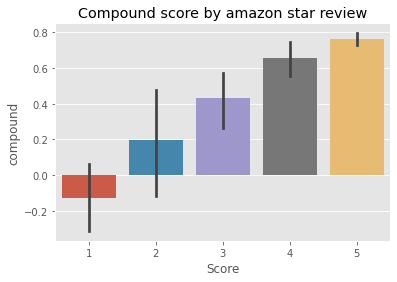

In [24]:
# Plotting the vader results
ax = sns.barplot(data = vaders, x= 'Score', y='compound')
ax.set_title('Compound score by amazon star review')
plt.show()

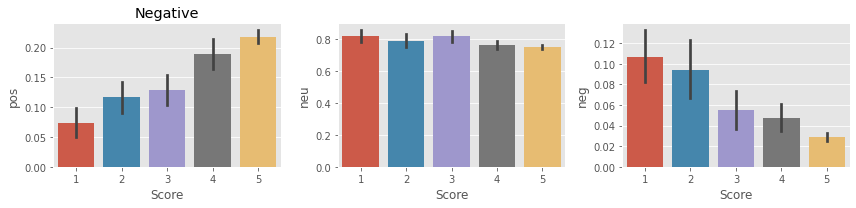

In [27]:
# Plotting the sns bar plot for positive, negative and neutral figures
fig, axs = plt.subplots(1,3, figsize= (12,3))
sns.barplot(data = vaders, x = 'Score', y= 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y= 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y= 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[0].set_title('Neutral')
axs[0].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

In [28]:
## Using a model of large corpus of data
## Transformer model accounts for the words but also the context
## related to the other words

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

## softmax is the optimization function

In [29]:
## Defining the model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer .from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [31]:
# Displaying the VADER results on example
print(example)
sia.polarity_scores(example)

My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner.


{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.6249}

In [33]:
# Running for Roberta Model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()

## Applying the softmax function
scores = softmax(scores)

# Scores in the form of dictionary
scores_dict = {
    'roberta_pos' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_neg' : scores[2]

}
print(scores_dict)

{'roberta_pos': 0.010422172, 'roberta_neu': 0.06525929, 'roberta_neg': 0.9243185}


In [34]:
## Polarity scores for the "roberta" dataset
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [35]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [36]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Comaprison scores between models

In [37]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Combine and Compare

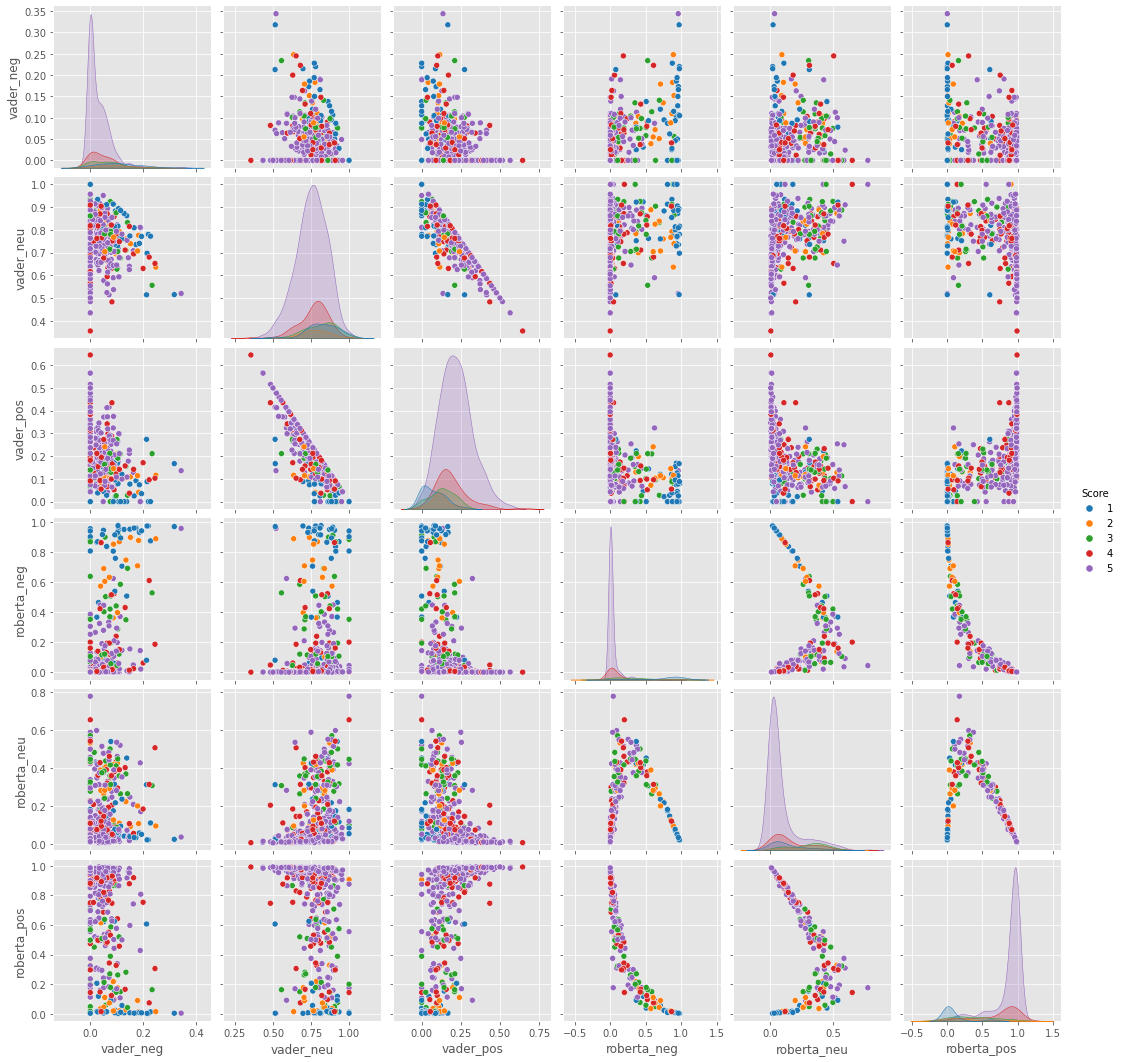

In [38]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Review the examples

Positive 1* and negative 5* Reviews

In [39]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [40]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [41]:
# nevative sentiment 5-Star view

In [42]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## The Transformers Pipeline

In [44]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

2022-12-13 14:09:06.229645: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [45]:
sent_pipeline("I love my mother")

[{'label': 'POSITIVE', 'score': 0.999830961227417}]

In [46]:
sent_pipeline("May you die")

[{'label': 'NEGATIVE', 'score': 0.9906367659568787}]